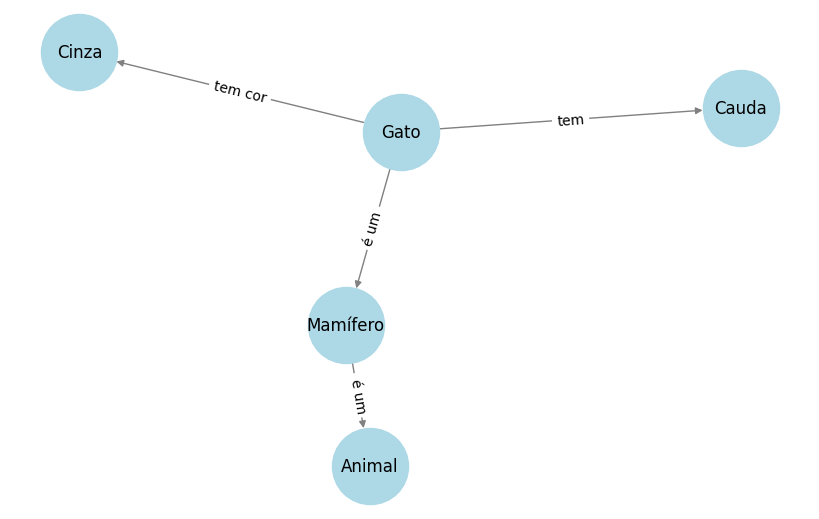

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo direcionado
G = nx.DiGraph()

# Adicionando nós (conceitos)
nodes = ["Gato", "Mamífero", "Animal", "Cauda", "Cinza"]
G.add_nodes_from(nodes)

# Adicionando arestas (relações)
relations = [("Gato", "Mamífero", "é um"),
             ("Mamífero", "Animal", "é um"),
             ("Gato", "Cauda", "tem"),
             ("Gato", "Cinza", "tem cor")]

for src, dst, label in relations:
    G.add_edge(src, dst, label=label)

# Desenhando o grafo
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', edge_color='gray')
labels = {(src, dst): lbl for src, dst, lbl in relations}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [3]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [6]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

# Definir a estrutura do grafo
modelo = DiscreteBayesianNetwork([('Chover', 'Trânsito'), ('Chover', 'Atraso'), ('Trânsito', 'Atraso')])

# Definir as Tabelas de Probabilidades Condicionais (DPCs)
cpd_chover = TabularCPD(variable='Chover', variable_card=2, values=[[0.7], [0.3]])
cpd_transito = TabularCPD(variable='Trânsito', variable_card=2,
                           values=[[0.9, 0.4], [0.1, 0.6]],
                           evidence=['Chover'], evidence_card=[2])
cpd_atraso = TabularCPD(variable='Atraso', variable_card=2,
                         values=[[0.9, 0.6, 0.7, 0.1], [0.1, 0.4, 0.3, 0.9]],
                         evidence=['Trânsito', 'Chover'], evidence_card=[2, 2])

# Adicionar as DPCs ao modelo
modelo.add_cpds(cpd_chover, cpd_transito, cpd_atraso)

# Verificar se o modelo é válido
print("Modelo é válido?", modelo.check_model())

Modelo é válido? True


In [7]:
# Criando o objeto de inferência
infer = VariableElimination(modelo)

# Consultando a probabilidade de atraso dado que está chovendo
prob_atraso_dado_chuva = infer.query(variables=['Atraso'], evidence={'Chover': 1})
print(prob_atraso_dado_chuva)

+-----------+---------------+
| Atraso    |   phi(Atraso) |
+===========+===============+
| Atraso(0) |        0.3000 |
+-----------+---------------+
| Atraso(1) |        0.7000 |
+-----------+---------------+
